In [33]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
basement=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
attic=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
attic['SalePrice']=0
basement=basement.append(pd.read_csv('house-prices-advanced-regression-techniques/test.csv'),ignore_index = True,sort=False)
basement.isna().sum(axis=0)[basement.isna().sum(axis=0)>0].index
  

attic.isna().sum(axis=0)[basement.isna().sum(axis=0)>0].index
  

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [34]:
mean=basement.groupby(['Neighborhood']).mean()['LotFrontage']
basement['LotFrontage'] =basement.apply(lambda row: mean[row['Neighborhood']] if np.isnan(row['LotFrontage']) else row['LotFrontage'],
    axis=1
)
basement.MoSold=basement.MoSold+12*(basement.YrSold-2006)
basement.drop(columns=['YrSold'])
#basement.MoSold.unique()
basement['Alley']=basement['Alley'].fillna('None')
basement.isna().sum(axis=0)
basement.drop(columns=['Utilities'])
basement=basement.fillna(0)


cols=['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish',  'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
basement=pd.get_dummies(basement, prefix_sep="__",
                              columns=cols)

mean=attic.groupby(['Neighborhood']).mean()['LotFrontage']
attic['LotFrontage'] =attic.apply(lambda row: mean[row['Neighborhood']] if np.isnan(row['LotFrontage']) else row['LotFrontage'],
    axis=1
)
attic.MoSold=attic.MoSold+12*(attic.YrSold-2006)
attic.drop(columns=['YrSold'])
attic['Alley']=attic['Alley'].fillna('None')
attic.isna().sum(axis=0)
attic.drop(columns=['Utilities'])
attic=attic.fillna(0)


cols=['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish',  'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
attic=pd.get_dummies(attic, prefix_sep="__",
                              columns=cols)
basement=basement.drop([523,1298])

In [35]:
basement.to_csv('basement.csv',index=False)
attic.to_csv('attic.csv',index=False)

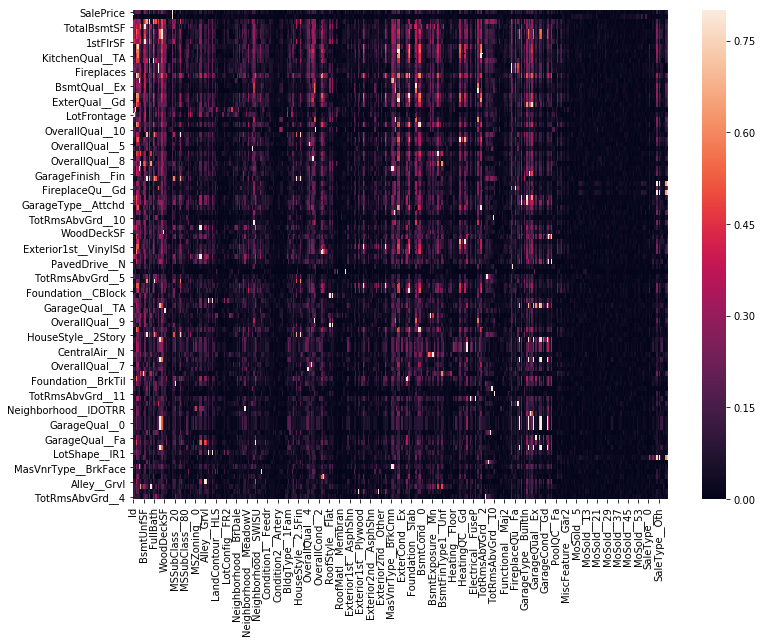

In [33]:
import seaborn as sns
corrmat = basement.corr().abs().sort_values('SalePrice', ascending=False)
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat[0:100][0:100], vmax=0.8)
#basement.corr()['SalePrice'][corrmat['SalePrice'].index[1:20]]

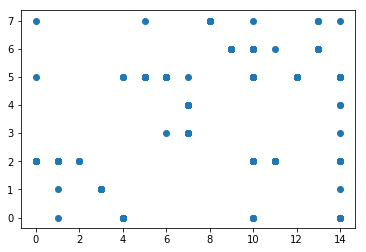

In [15]:
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)
integer_encoded = label_encoder.fit_transform(basement[basement.columns[i]])
integer_encoded2 = label_encoder.fit_transform(basement[basement.columns[1]])
import matplotlib as plt
%matplotlib inline

plt.pyplot.scatter(x=integer_encoded2, y=integer_encoded)

In [63]:
df=pd.DataFrame()

df=df.append( pd.DataFrame(integer_encoded))
df[1]=basement[basement.columns[i]]
df['subtype']=pd.DataFrame(integer_encoded2)
df['key']=basement[basement.columns[1]]

#df[0]=df[0]+df['subtype']

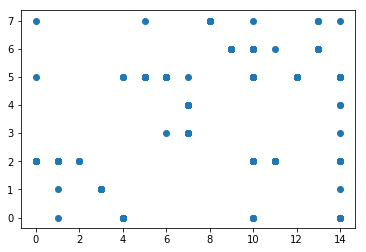

In [64]:
plt.pyplot.scatter(x=df.subtype, y=df[0])

In [62]:
df.groupby('subtype')[0].apply(lambda x:list(np.unique(x)))

subtype
0                 [2, 5, 7]
1                 [0, 1, 2]
2                       [2]
3                       [1]
4                    [0, 5]
5                    [5, 7]
6                    [3, 5]
7                 [3, 4, 5]
8                       [7]
9                       [6]
10          [0, 2, 5, 6, 7]
11                   [2, 6]
12                      [5]
13                   [6, 7]
14    [0, 1, 2, 3, 4, 5, 7]
Name: 0, dtype: object

In [69]:
price=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')['SalePrice']

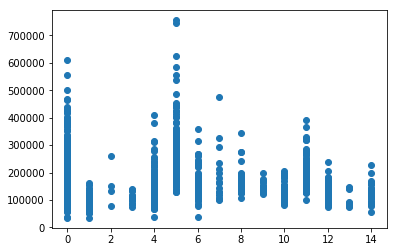

In [73]:
plt.pyplot.scatter(x=df['subtype'], y=price)

In [82]:
basement.SalePrice[1459]

147500.0

In [128]:
basement.columns

Index(['Id', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition2', 'HouseStyle',
       ...
       'MSSubClass__40__0', 'MSSubClass__40__1', 'MSSubClass__50__0',
       'MSSubClass__50__1', 'MSSubClass__70__0', 'MSSubClass__70__1',
       'MSSubClass__80__0', 'MSSubClass__80__1', 'MSSubClass__90__0',
       'MSSubClass__90__1'],
      dtype='object', length=311)

In [113]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YearRemodAdd,OverallCond__1,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9
0,1,60,RL,65.000000,8450,Pave,None,Reg,Lvl,AllPub,...,2003,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.000000,9600,Pave,None,Reg,Lvl,AllPub,...,1976,0,0,0,0,0,0,0,1,0
2,3,60,RL,68.000000,11250,Pave,None,IR1,Lvl,AllPub,...,2002,0,0,0,0,1,0,0,0,0
3,4,70,RL,60.000000,9550,Pave,None,IR1,Lvl,AllPub,...,1970,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.000000,14260,Pave,None,IR1,Lvl,AllPub,...,2000,0,0,0,0,1,0,0,0,0
5,6,50,RL,85.000000,14115,Pave,None,IR1,Lvl,AllPub,...,1995,0,0,0,0,1,0,0,0,0
6,7,20,RL,75.000000,10084,Pave,None,Reg,Lvl,AllPub,...,2005,0,0,0,0,1,0,0,0,0
7,8,60,RL,81.288889,10382,Pave,None,IR1,Lvl,AllPub,...,1973,0,0,0,0,0,1,0,0,0
8,9,50,RM,51.000000,6120,Pave,None,Reg,Lvl,AllPub,...,1950,0,0,0,0,1,0,0,0,0
9,10,190,RL,50.000000,7420,Pave,None,Reg,Lvl,AllPub,...,1950,0,0,0,0,0,1,0,0,0


In [109]:
df=pd.get_dummies(basement, prefix_sep="__",
                              columns=['MSSubClass'])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,...,OverallQual__10,OverallCond__1,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9
0,1,65.000000,8450,2003,2003,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,80.000000,9600,1976,1976,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,68.000000,11250,2001,2002,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,60.000000,9550,1915,1970,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,84.000000,14260,2000,2000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,6,85.000000,14115,1993,1995,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,7,75.000000,10084,2004,2005,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,81.288889,10382,1973,1973,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,9,51.000000,6120,1931,1950,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,10,50.000000,7420,1939,1950,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
attic.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
basement.GrLivArea[1:1460].sort_values(ascending=False)


1298    5642
523     4676
1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
1353    3238
496     3228
118     3222
608     3194
798     3140
197     3112
1173    3086
1031    3082
324     2978
58      2945
1024    2898
1175    2872
961     2872
1046    2868
1142    2828
803     2822
1312    2810
231     2794
1328    2792
1386    2784
        ... 
952      768
543      767
264      764
125      754
372      752
68       747
935      747
710      729
1321     720
495      720
353      720
1323     708
1123     698
438      694
1337     693
1001     691
1212     672
402      672
489      630
649      630
614      630
1449     630
1039     630
434      630
696      616
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1459, dtype: int64

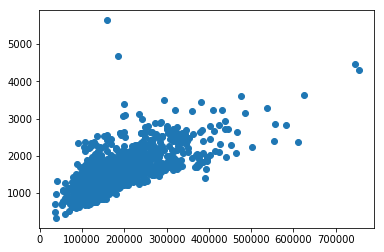

In [12]:
plt.scatter(basement.SalePrice[1:1460],basement.GrLivArea[1:1460])

In [32]:
basement.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,1,65.000000,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.000000,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.000000,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.000000,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.000000,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
5,6,85.000000,14115,1993,1995,0.0,732.0,0.0,64.0,796.0,...,0,0,0,1,0,0,0,0,1,0
6,7,75.000000,10084,2004,2005,186.0,1369.0,0.0,317.0,1686.0,...,0,0,0,1,0,0,0,0,1,0
7,8,81.517647,10382,1973,1973,240.0,859.0,32.0,216.0,1107.0,...,0,0,0,1,0,0,0,0,1,0
8,9,51.000000,6120,1931,1950,0.0,0.0,0.0,952.0,952.0,...,0,0,0,1,1,0,0,0,0,0
9,10,50.000000,7420,1939,1950,0.0,851.0,0.0,140.0,991.0,...,0,0,0,1,0,0,0,0,1,0


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,1,65.000000,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.000000,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.000000,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.000000,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.000000,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
5,6,85.000000,14115,1993,1995,0.0,732.0,0.0,64.0,796.0,...,0,0,0,1,0,0,0,0,1,0
6,7,75.000000,10084,2004,2005,186.0,1369.0,0.0,317.0,1686.0,...,0,0,0,1,0,0,0,0,1,0
7,8,81.517647,10382,1973,1973,240.0,859.0,32.0,216.0,1107.0,...,0,0,0,1,0,0,0,0,1,0
8,9,51.000000,6120,1931,1950,0.0,0.0,0.0,952.0,952.0,...,0,0,0,1,1,0,0,0,0,0
9,10,50.000000,7420,1939,1950,0.0,851.0,0.0,140.0,991.0,...,0,0,0,1,0,0,0,0,1,0


In [36]:
basement

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,1,65.000000,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.000000,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.000000,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.000000,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.000000,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
5,6,85.000000,14115,1993,1995,0.0,732.0,0.0,64.0,796.0,...,0,0,0,1,0,0,0,0,1,0
6,7,75.000000,10084,2004,2005,186.0,1369.0,0.0,317.0,1686.0,...,0,0,0,1,0,0,0,0,1,0
7,8,81.517647,10382,1973,1973,240.0,859.0,32.0,216.0,1107.0,...,0,0,0,1,0,0,0,0,1,0
8,9,51.000000,6120,1931,1950,0.0,0.0,0.0,952.0,952.0,...,0,0,0,1,1,0,0,0,0,0
9,10,50.000000,7420,1939,1950,0.0,851.0,0.0,140.0,991.0,...,0,0,0,1,0,0,0,0,1,0
